In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('heart.csv')

# Basic info
print("Shape:", df.shape)  # (rows, columns)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Shape: (918, 12)

Data Types:
 Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Missing Values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
# To get a summery statistics
selected_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
print(df[selected_cols].describe().round(1))

         Age  RestingBP  Cholesterol  MaxHR  Oldpeak  HeartDisease
count  918.0      918.0        918.0  918.0    918.0         918.0
mean    53.5      132.4        198.8  136.8      0.9           0.6
std      9.4       18.5        109.4   25.5      1.1           0.5
min     28.0        0.0          0.0   60.0     -2.6           0.0
25%     47.0      120.0        173.2  120.0      0.0           0.0
50%     54.0      130.0        223.0  138.0      0.6           1.0
75%     60.0      140.0        267.0  156.0      1.5           1.0
max     77.0      200.0        603.0  202.0      6.2           1.0


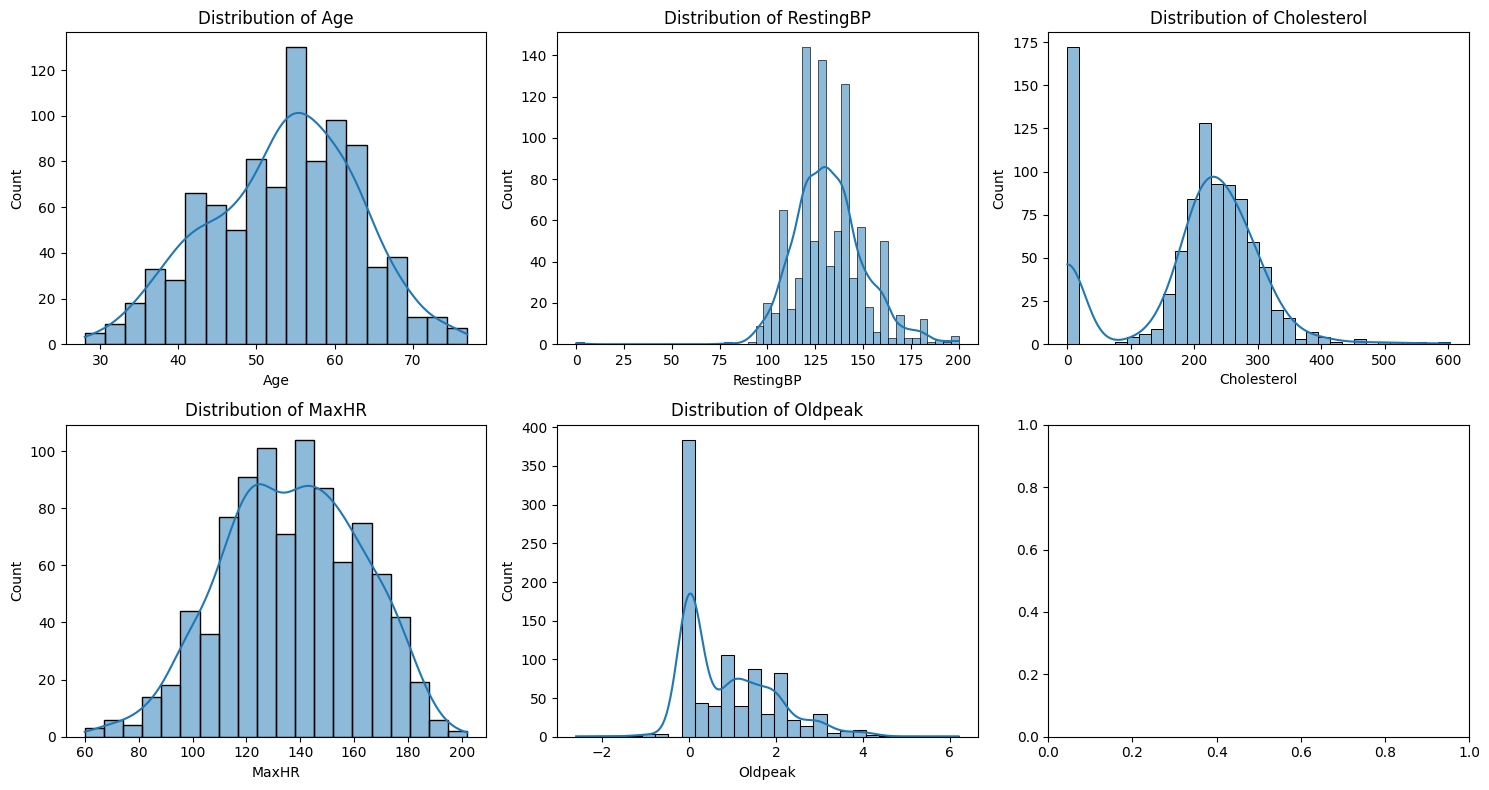

In [ ]:
# Plot histograms for numerical features
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

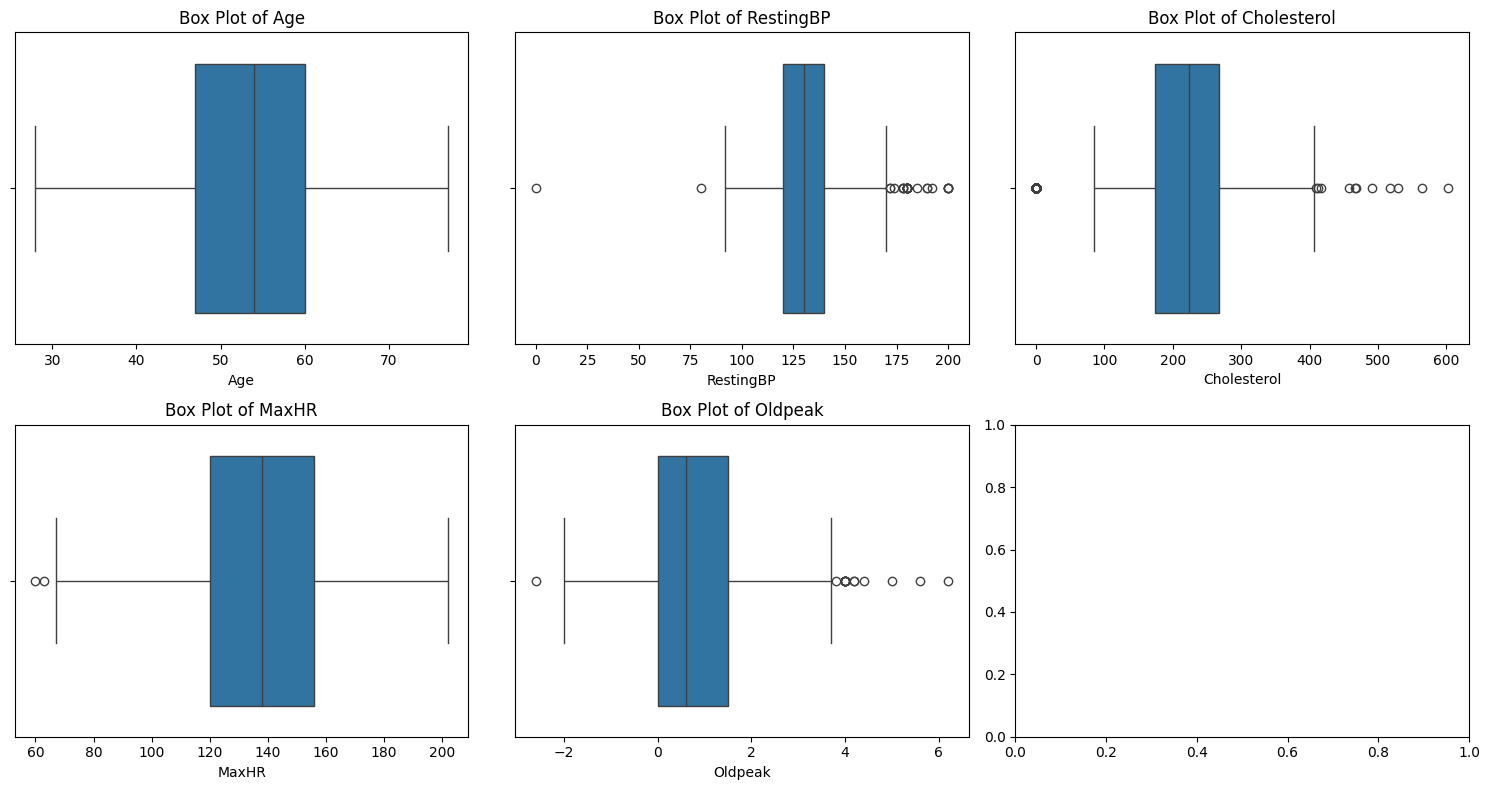

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

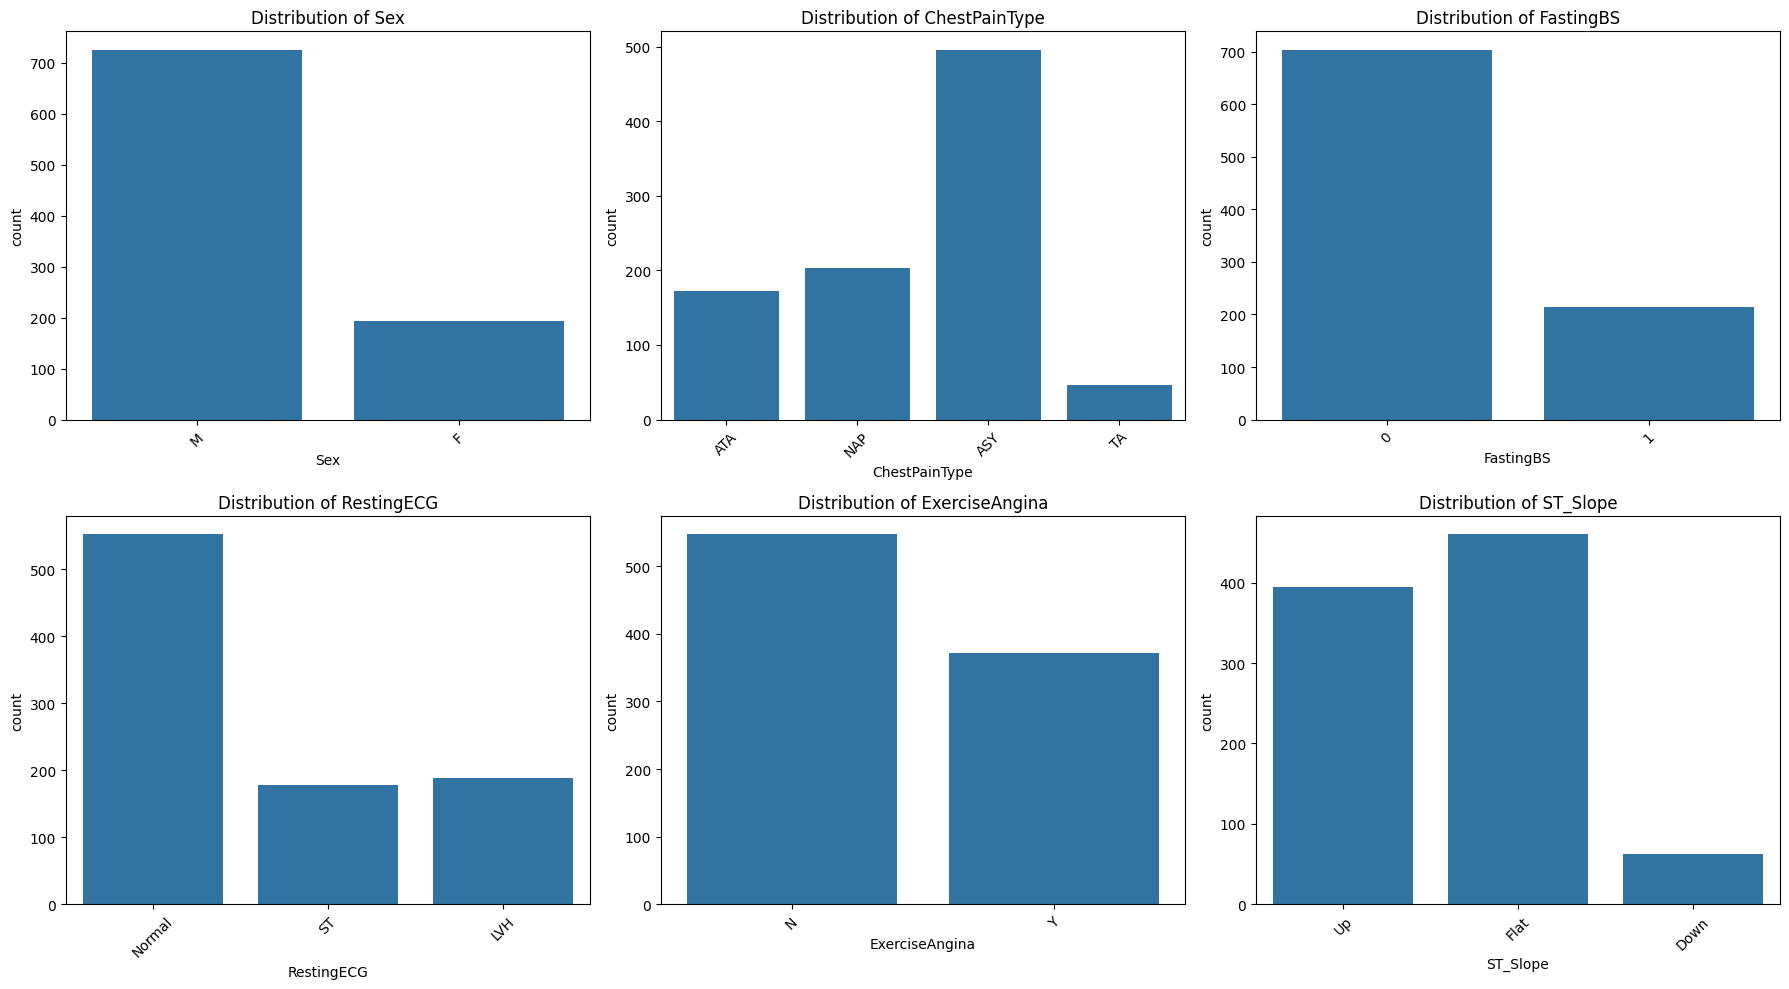

In [ ]:
# Plot bar charts for categorical features
cat_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

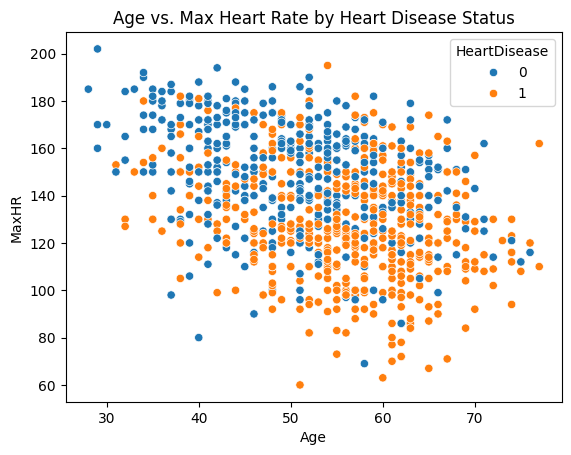

In [ ]:
sns.scatterplot(x='Age', y='MaxHR', hue='HeartDisease', data=df)
plt.title('Age vs. Max Heart Rate by Heart Disease Status')
plt.show()

In [ ]:
# Identify invalid RestingBP and Cholesterol entries
invalid_bp = df[df['RestingBP'] == 0]
invalid_chol = df[df['Cholesterol'] == 0]

print(f"Invalid RestingBP entries: {len(invalid_bp)}")
print(f"Invalid Cholesterol entries: {len(invalid_chol)}")

Invalid RestingBP entries: 1
Invalid Cholesterol entries: 172


In [ ]:
# Clean the data
df_clean = df[(df['RestingBP'] != 0) & (df['Cholesterol'] != 0)].copy()

# Encode categorical variables
df_encoded = pd.get_dummies(df_clean, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

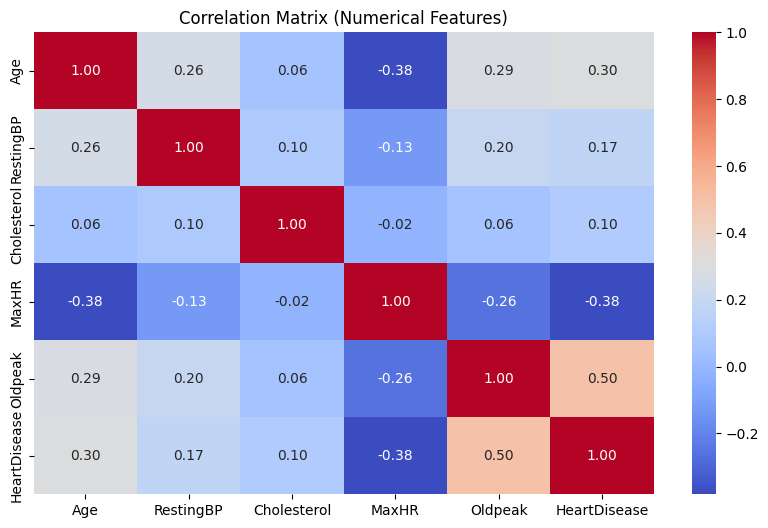

In [ ]:
# Correlation matrix for numerical features
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


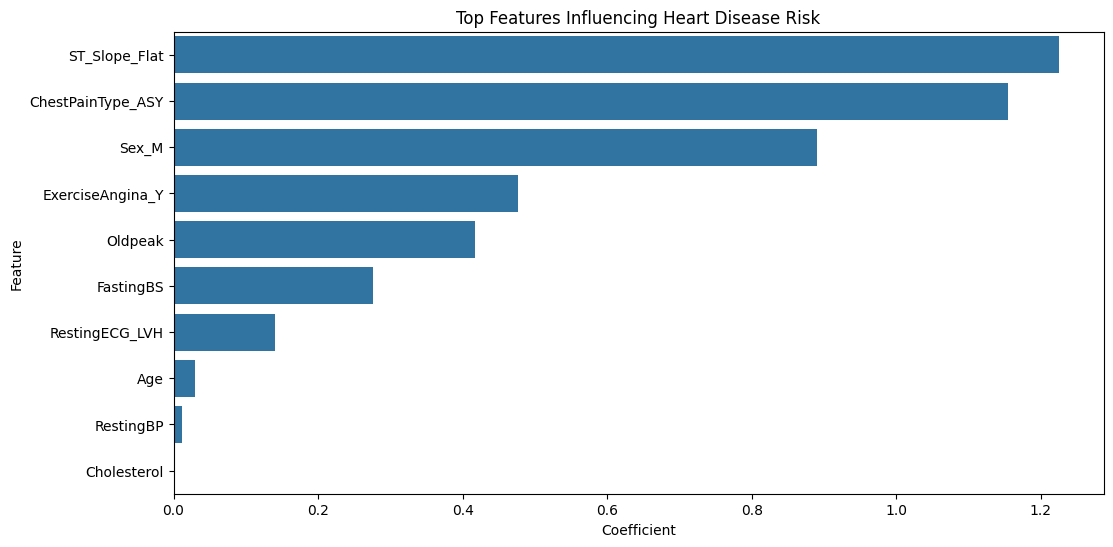

In [ ]:
# Split data into features (X) and target (y)
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Feature importance (coefficients)
importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
importance = importance.sort_values(by='Coefficient', ascending=False)

# Plot coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance.head(10))
plt.title('Top Features Influencing Heart Disease Risk')
plt.show()

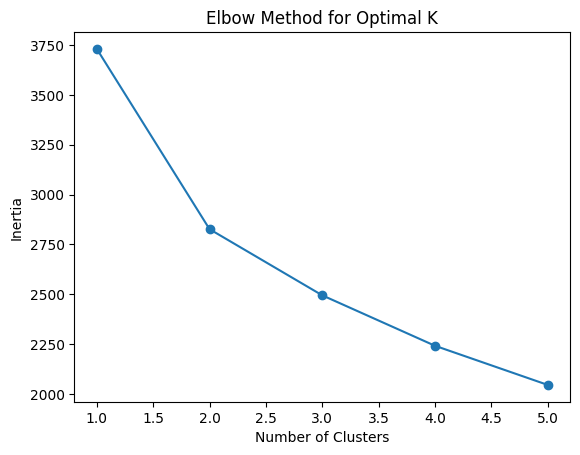

In [ ]:
# Select features for clustering
cluster_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
X_cluster = df_clean[cluster_features]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Elbow method to find optimal clusters
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 6), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

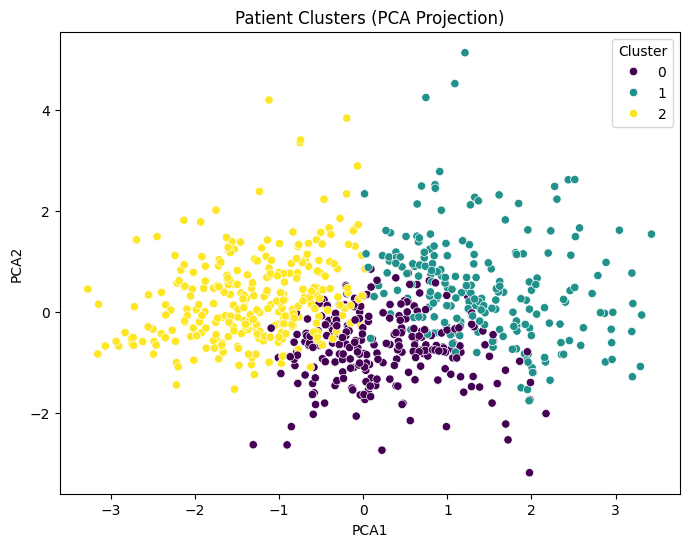

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters using PCA (2D projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_clean['PCA1'] = X_pca[:, 0]
df_clean['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_clean, palette='viridis')
plt.title('Patient Clusters (PCA Projection)')
plt.show()